# YOLOv8 İle Görüntü Sınıflandırma


### Ortam Hazırlığı


In [ ]:
# drive'a bağlanma
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!pwd

/content


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification

/content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification


In [7]:
#Ultralytics'i İndirme
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


### Sınıflandırma / Prediction

In [ ]:
# Resim Sınıflandırma / Test / ImageNet
!yolo classify predict model=yolov8l-cls.pt source="https://britishpetinsurance.co.uk/wp-content/uploads/2021/10/Pomeranian-featured-2.jpg" save=True

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 37465576 parameters, 0 gradients, 99.7 GFLOPs

Found https://britishpetinsurance.co.uk/wp-content/uploads/2021/10/Pomeranian-featured-2.jpg locally at Pomeranian-featured-2.jpg
100% 755k/755k [00:00<00:00, 143MB/s]
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification/Pomeranian-featured-2.jpg: 224x224 Pomeranian 1.00, keeshond 0.00, Pekinese 0.00, Chihuahua 0.00, papillon 0.00, 10.9ms
Speed: 15.9ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


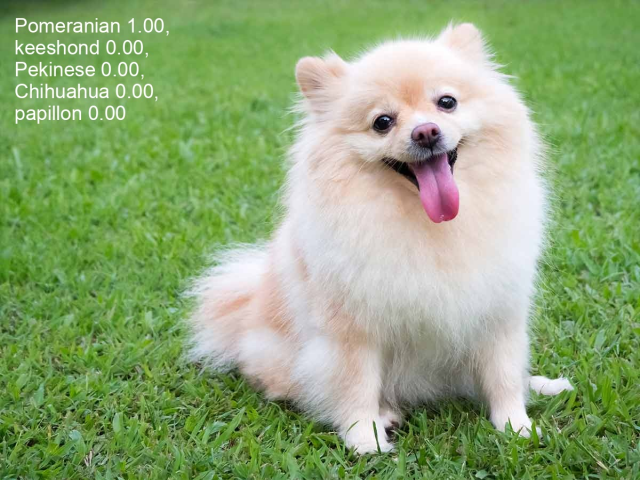

In [ ]:
# Sonuçları İncele
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification/runs/classify/predict/Pomeranian-featured-2.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img , width=640)
cv2_imshow(img)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification/runs/classify/predict/Pomeranian-featured-2.jpg: 224x224 Pomeranian 1.00, keeshond 0.00, Pekinese 0.00, Chihuahua 0.00, papillon 0.00, 401.2ms
Speed: 1.4ms preprocess, 401.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


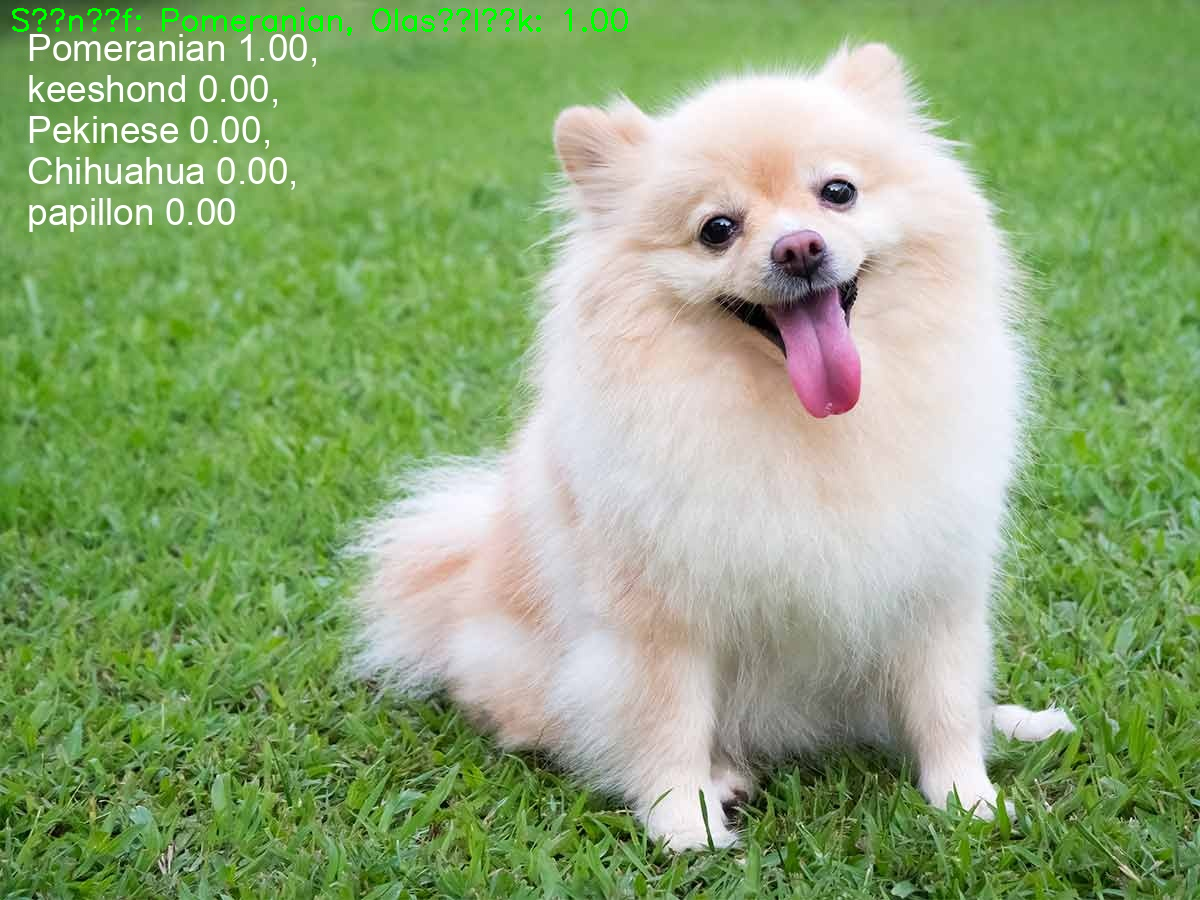

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Resim ve model yolu
img_path = "runs/classify/predict/Pomeranian-featured-2.jpg"
model_path = "yolov8l-cls.pt"

# YOLO modelini yükle
model = YOLO(model_path)

# Resmi sınıflandır ve sonuçları al
results = model(img_path)
class_dict = results[0].names
probs = results[0].probs.data.tolist()
max_prob_index = np.argmax(probs)
max_prob_class = class_dict[max_prob_index]

# Resmi oku
img = cv2.imread(img_path)

# Sonuçları resmin üzerine yazdır
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2
text = f"Sınıf: {max_prob_class}, Olasılık: {probs[max_prob_index]:.2f}"
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_x = 10
text_y = 30
cv2.putText(img, text, (text_x, text_y), font, font_scale, (0, 255, 0), font_thickness)

# Resmi göster
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Eğitim / Training

In [ ]:
# Dosyaları Ayıkla
!unzip data/covid_classification.zip -d ./data

In [ ]:
# Eğitim
!yolo classify train model=yolov8l-cls.pt data=data/covid_classification imgsz=224 workers=8 batch=16 epochs=25 name="yolov8_classification"

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=data/covid_classification, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_classification2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

In [ ]:
# Eğitim Yarıda Kesilirse
!yolo classify train model=... resume=True

### COVID Sınıflandırma / Prediction

In [10]:
# Resim Sınıflandırma
!yolo predict model=/content/drive/MyDrive/Colab\ Notebooks/Computer\ Vision/YOLOv8/0_image_classification/runs/classify/yolov8_classification2/weights/best.pt source=inference save=True


Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs

100% 755k/755k [00:00<00:00, 17.6MB/s]
image 1/12 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification/inference/COVID-10.png: 224x224 covid 1.00, viral_pneumonia 0.00, normal 0.00, 559.3ms
image 2/12 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification/inference/COVID-13.png: 224x224 normal 1.00, viral_pneumonia 0.00, covid 0.00, 407.0ms
image 3/12 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification/inference/COVID-15.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 365.5ms
image 4/12 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/0_image_classification/inference/COVID-4.png: 224x224 viral_pneumonia 0.79, normal 0.21, covid 0.00, 265.6ms
image 5/12 /content/drive/MyDrive/Colab Notebooks/Compute